## **_Regresion lineal_**
se utiliza para predecir un valor continuo basandose en una o mas variables independientes(caracteristicas)

**_Conceptos basicos_**
__Modelo Lineal:__ La regresion lineal asume una relacion lineal entre las caracteristicas (X) y el valor objetivo (y). la formula basica es:  y=wX+b
Donde:
- 𝑦 es la variable objetivo.
- 𝑋 es la variable independiente.
- 𝑤 es el coeficiente de la pendiente.
- 𝑏 es la intersección con el eje y (también conocido como sesgo o intercepto).

__Funcion de costo:__ Para ajustar la linea de regresion, necesitamos minimizae la diferencia entre las predicciones y los valores reales. La función de costo comúnmente usada es el Error Cuadrático Medio (MSE)

__Gradiente descendente:__ Un algoritmo para minimizar la funcion de costo ajustando los parametros (w y b)

### Ejemplo practico

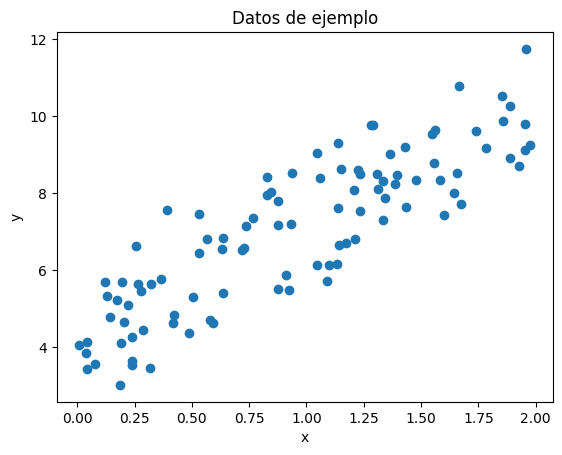

Iteration 0: Cost 38.8901010085235
Iteration 100: Cost 1.3101307429917295
Iteration 200: Cost 0.6705723719047965
Iteration 300: Cost 0.6161626227259244
Iteration 400: Cost 0.5830295478411678
Iteration 500: Cost 0.5591187559935217
Iteration 600: Cost 0.5417949652070698
Iteration 700: Cost 0.5292425174469526
Iteration 800: Cost 0.5201472664132134
Iteration 900: Cost 0.5135570303028821


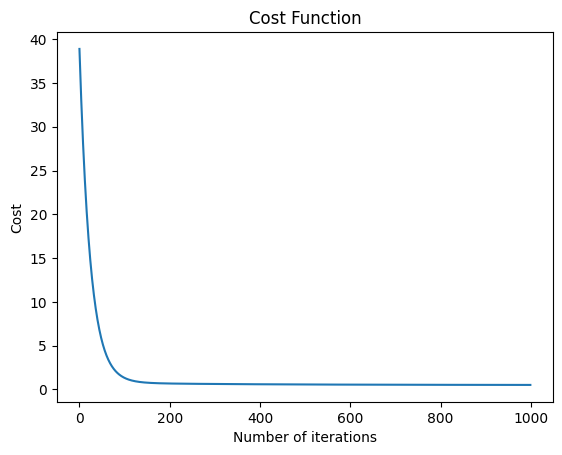

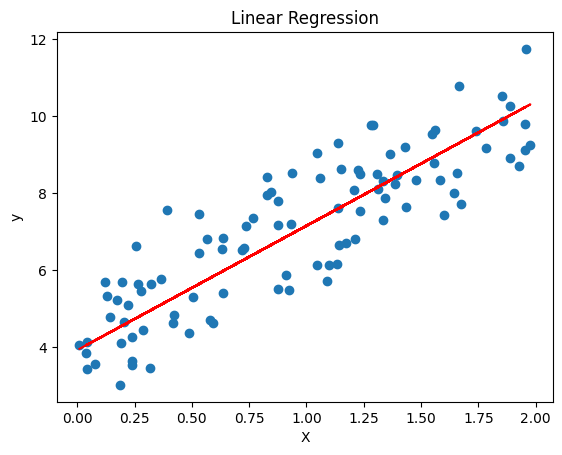

w: [[3.23112218]], b: [3.92614535]


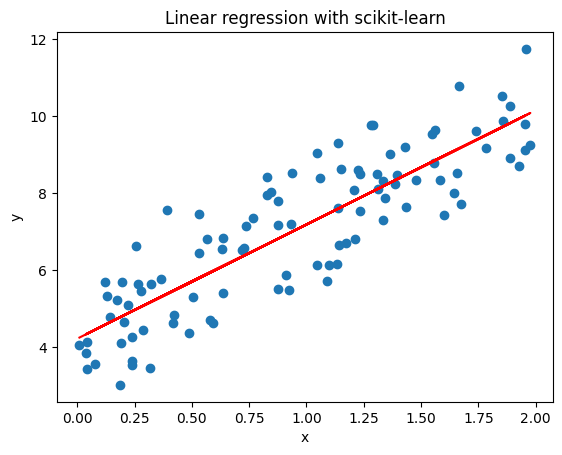

w: [[2.96846751]], b: [4.22215108]


In [5]:
# 1. Generar datos sinteticos
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generar datos de ejemplo
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos de ejemplo')
plt.show()

# 2. Implementar la regresion lineal
# Inicializar parametros
w = np.random.randn(1, 1)
b = np.random.randn(1)
learning_rate = 0.01
num_iterations = 1000

# Funcion de costo
def compute_cost(X, y, w, b):
    m = len(y)
    cost = (1/(2*m))*np.sum((X.dot(w)+b-y)**2)
    return cost

# Gradiente descendente
def gradient_descent(X, y, w, b, learning_rate, num_iterations):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        y_pred = X.dot(w) + b
        dw = (1/m) * X.T.dot(y_pred - y)
        db = (1/m) * np.sum(y_pred - y)
        w -= learning_rate * dw
        b -= learning_rate * db
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)
        
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")
    
    return w, b, cost_history

# Ejecutar gradiente desendente
w, b, cost_history = gradient_descent(X, y, w, b, learning_rate, num_iterations)

# Plotear el costo
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.show()

# Plotear la regresión lineal
plt.scatter(X, y)
plt.plot(X, X.dot(w) + b, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

print(f"w: {w}, b: {b}")

# 3. Interpretar los resultados
# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X, y)

# Predecir
y_pred = model.predict(X)

# Plotear ka regresion lineal
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear regression with scikit-learn')
plt.show()

print(f'w: {model.coef_}, b: {model.intercept_}')
